In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('crime_dataset_india.csv', index_col=False)
ds.shape

(40160, 14)

In [3]:
ds.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2/1/2020 0:00,1/1/2020 0:00,1/1/2020 1:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,1/1/2020 19:00,1/1/2020 1:00,1/1/2020 6:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,2/1/2020 5:00,1/1/2020 2:00,1/1/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,1/1/2020 5:00,1/1/2020 3:00,1/1/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,1/1/2020 21:00,1/1/2020 4:00,1/1/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,8/1/2020 21:00


In [4]:
ds.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [6]:
ds.fillna("Not Disclosed").head()     #it handles the missing values

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2/1/2020 0:00,1/1/2020 0:00,1/1/2020 1:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,Not Disclosed
1,2,1/1/2020 19:00,1/1/2020 1:00,1/1/2020 6:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,Not Disclosed
2,3,2/1/2020 5:00,1/1/2020 2:00,1/1/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,Not Disclosed
3,4,1/1/2020 5:00,1/1/2020 3:00,1/1/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,1/1/2020 21:00,1/1/2020 4:00,1/1/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,8/1/2020 21:00


In [7]:
[features for features in ds.columns if ds[features].isnull().sum()>0]

['Weapon Used', 'Date Case Closed']

In [8]:
ds.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [9]:
data = ds[['Time of Occurrence', 'City','Crime Description', 'Victim Age', 'Victim Gender', 'Weapon Used']]
data.head()

,Time of Occurrence,City,Crime Description,Victim Age,Victim Gender,Weapon Used
0,1/1/2020 1:11,Ahmedabad,IDENTITY THEFT,16,M,Blunt Object
1,1/1/2020 6:26,Chennai,HOMICIDE,37,M,Poison
2,1/1/2020 14:30,Ludhiana,KIDNAPPING,48,F,Blunt Object
3,1/1/2020 14:46,Pune,BURGLARY,49,F,Firearm
4,1/1/2020 16:51,Pune,VANDALISM,30,F,Other


In [10]:
data.isnull().sum()

Time of Occurrence       0
City                     0
Crime Description        0
Victim Age               0
Victim Gender            0
Weapon Used           5790
dtype: int64

In [11]:
ds['City'].value_counts().head(10)

City
Delhi        5400
Mumbai       4415
Bangalore    3588
Hyderabad    2881
Kolkata      2518
Chennai      2493
Pune         2212
Ahmedabad    1817
Jaipur       1479
Lucknow      1456
Name: count, dtype: int64

In [12]:
ds['City'].value_counts().head(10).values

array([5400, 4415, 3588, 2881, 2518, 2493, 2212, 1817, 1479, 1456],
      dtype=int64)

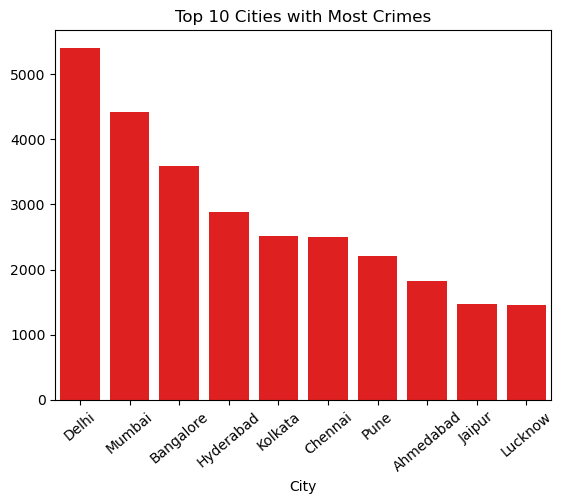

In [13]:

city_counts = ds['City'].value_counts().head(10)
sns.barplot(x=city_counts.index, y=city_counts.values, color='red')
plt.xticks(rotation=40)
plt.title("Top 10 Cities with Most Crimes");

In [14]:
weapon_count = data['Weapon Used'].value_counts()
weapon_count.values

array([5835, 5751, 5737, 5728, 5676, 5643], dtype=int64)

In [15]:
weapon_count.index

Index(['Knife', 'Explosives', 'Blunt Object', 'Poison', 'Other', 'Firearm'], dtype='object', name='Weapon Used')

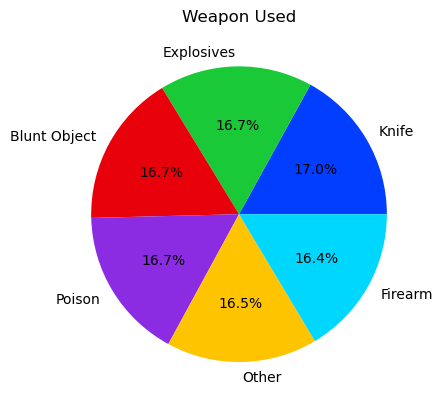

In [16]:
color = sns.color_palette('bright6')
plt.pie(weapon_count.values, labels=weapon_count.index, autopct='%1.1f%%', colors=color);
plt.title('Weapon Used');

In [17]:
data[['Victim Age', 'Victim Gender']].head()

,Victim Age,Victim Gender
0,16,M
1,37,M
2,48,F
3,49,F
4,30,F


In [18]:
data['Victim Age'].value_counts()

Victim Age
25    636
22    636
35    619
34    612
40    608
     ... 
58    538
57    535
12    534
71    531
52    523
Name: count, Length: 70, dtype: int64

C:\Users\GOURAV\AppData\Local\Temp\ipykernel_13792\3481001923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Age Group'] = pd.cut(data['Victim Age'], bins=[0, 18, 30, 45, 60, 100], labels=age_labels);


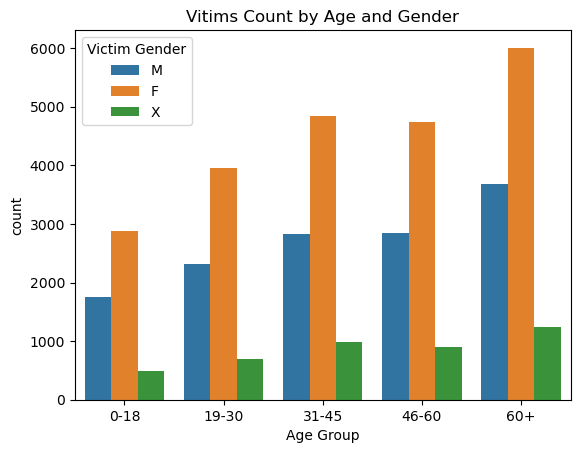

In [19]:
age_labels = ['0-18', '19-30','31-45', '46-60','60+'];
data.loc[:, 'Age Group'] = pd.cut(data['Victim Age'], bins=[0, 18, 30, 45, 60, 100], labels=age_labels);
plt.title('Vitims Count by Age and Gender');
sns.countplot(x='Age Group', hue='Victim Gender', data=data);